In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [8]:
def plot_post_betas(n1,n0,x,alpha=4,beta=2,save_fig = False,cnt=0,ax=None,points=[]):
    
    #this will be p(theta|x) -> posterior
    beta_dist = lambda x: (x**(n1+alpha-1))*(1-x)**(n0+beta-1)
    if cnt !=0:
        ax.plot(x,beta_dist(x),label=("Posterior Beta Distribution ({},{})".format(n1+alpha,n0+beta)));
    else:
        ax.plot(x,beta_dist(x),label=("Initial Beta Distribution ({},{})".format(n1+alpha,n0+beta)));
    if (n1+n0)!=0:
        theta_MLE = n1/(n1+n0)
        #if theta_MLE == 0:
            #ax.scatter(theta_MLE,beta_dist(theta_MLE),label="theta_MLE",color='red');
    
        #else:
            #ax.vlines(theta_MLE,ymin=0,ymax=beta_dist(theta_MLE),colors='red',label="theta_MLE",linewidth=1.5);
    
    if n0!=0:
        theta_MAP = (n1+alpha-1)/(n1+n0+alpha+beta-2)
        #ax.vlines(theta_MAP,ymin=0,ymax=beta_dist(theta_MAP),color='green',label="theta_MAP");
    
    
    theta_PP = (alpha+n1)/(alpha+beta+n1+n0)
    #ax.vlines(theta_PP,ymin=0,ymax=beta_dist(theta_PP),color='magenta',label="theta_PP")
    ax.set_ylim(0,beta_dist(theta_PP)+beta_dist(theta_PP)*0.2)
    ax.set_xlim(-0.1,1.2);
    plt.tight_layout();
    
    ax.legend();

    ax.set_title("# points: {}, Data points {}".format(len(points),points))
    
    if save_fig:
        plt.savefig("Thetas {}".format(cnt))

In [9]:
def plot_thetas(n1,n0,x,alpha=4,beta=2,save_fig = False,cnt=0,ax=None,points=[]):
    
    #this will be p(theta|x) -> posterior
    beta_dist = lambda x: (x**(n1+alpha-1))*(1-x)**(n0+beta-1)
    if cnt !=0:
        ax.plot(x,beta_dist(x),label=("Posterior Beta Distribution ({},{})".format(n1+alpha,n0+beta)));
    else:
        ax.plot(x,beta_dist(x),label=("Initial Beta Distribution ({},{})".format(n1+alpha,n0+beta)));
    
    if (n1+n0)!=0:
        theta_MLE = n1/(n1+n0)
        if theta_MLE == 0:
            ax.scatter(theta_MLE,beta_dist(theta_MLE),label="theta_MLE",color='red');
    
        else:
            ax.vlines(theta_MLE,ymin=0,ymax=beta_dist(theta_MLE),colors='red',label="theta_MLE",linewidth=1.5);
    
    if n0!=0:
        theta_MAP = (n1+alpha-1)/(n1+n0+alpha+beta-2)
        ax.vlines(theta_MAP,ymin=0,ymax=beta_dist(theta_MAP),color='green',label="theta_MAP");
    
    
    theta_PP = (alpha+n1)/(alpha+beta+n1+n0)
    ax.vlines(theta_PP,ymin=0,ymax=beta_dist(theta_PP),color='magenta',label="theta_PP")
    ax.set_ylim(0,beta_dist(theta_PP)+beta_dist(theta_PP)*0.2)
    ax.set_xlim(-0.1,1.2);
    plt.tight_layout();
    
    ax.legend();

    ax.set_title("# points: {}, Data points {}".format(len(points),points))
    
    if save_fig:
        plt.savefig("Thetas {}".format(cnt))

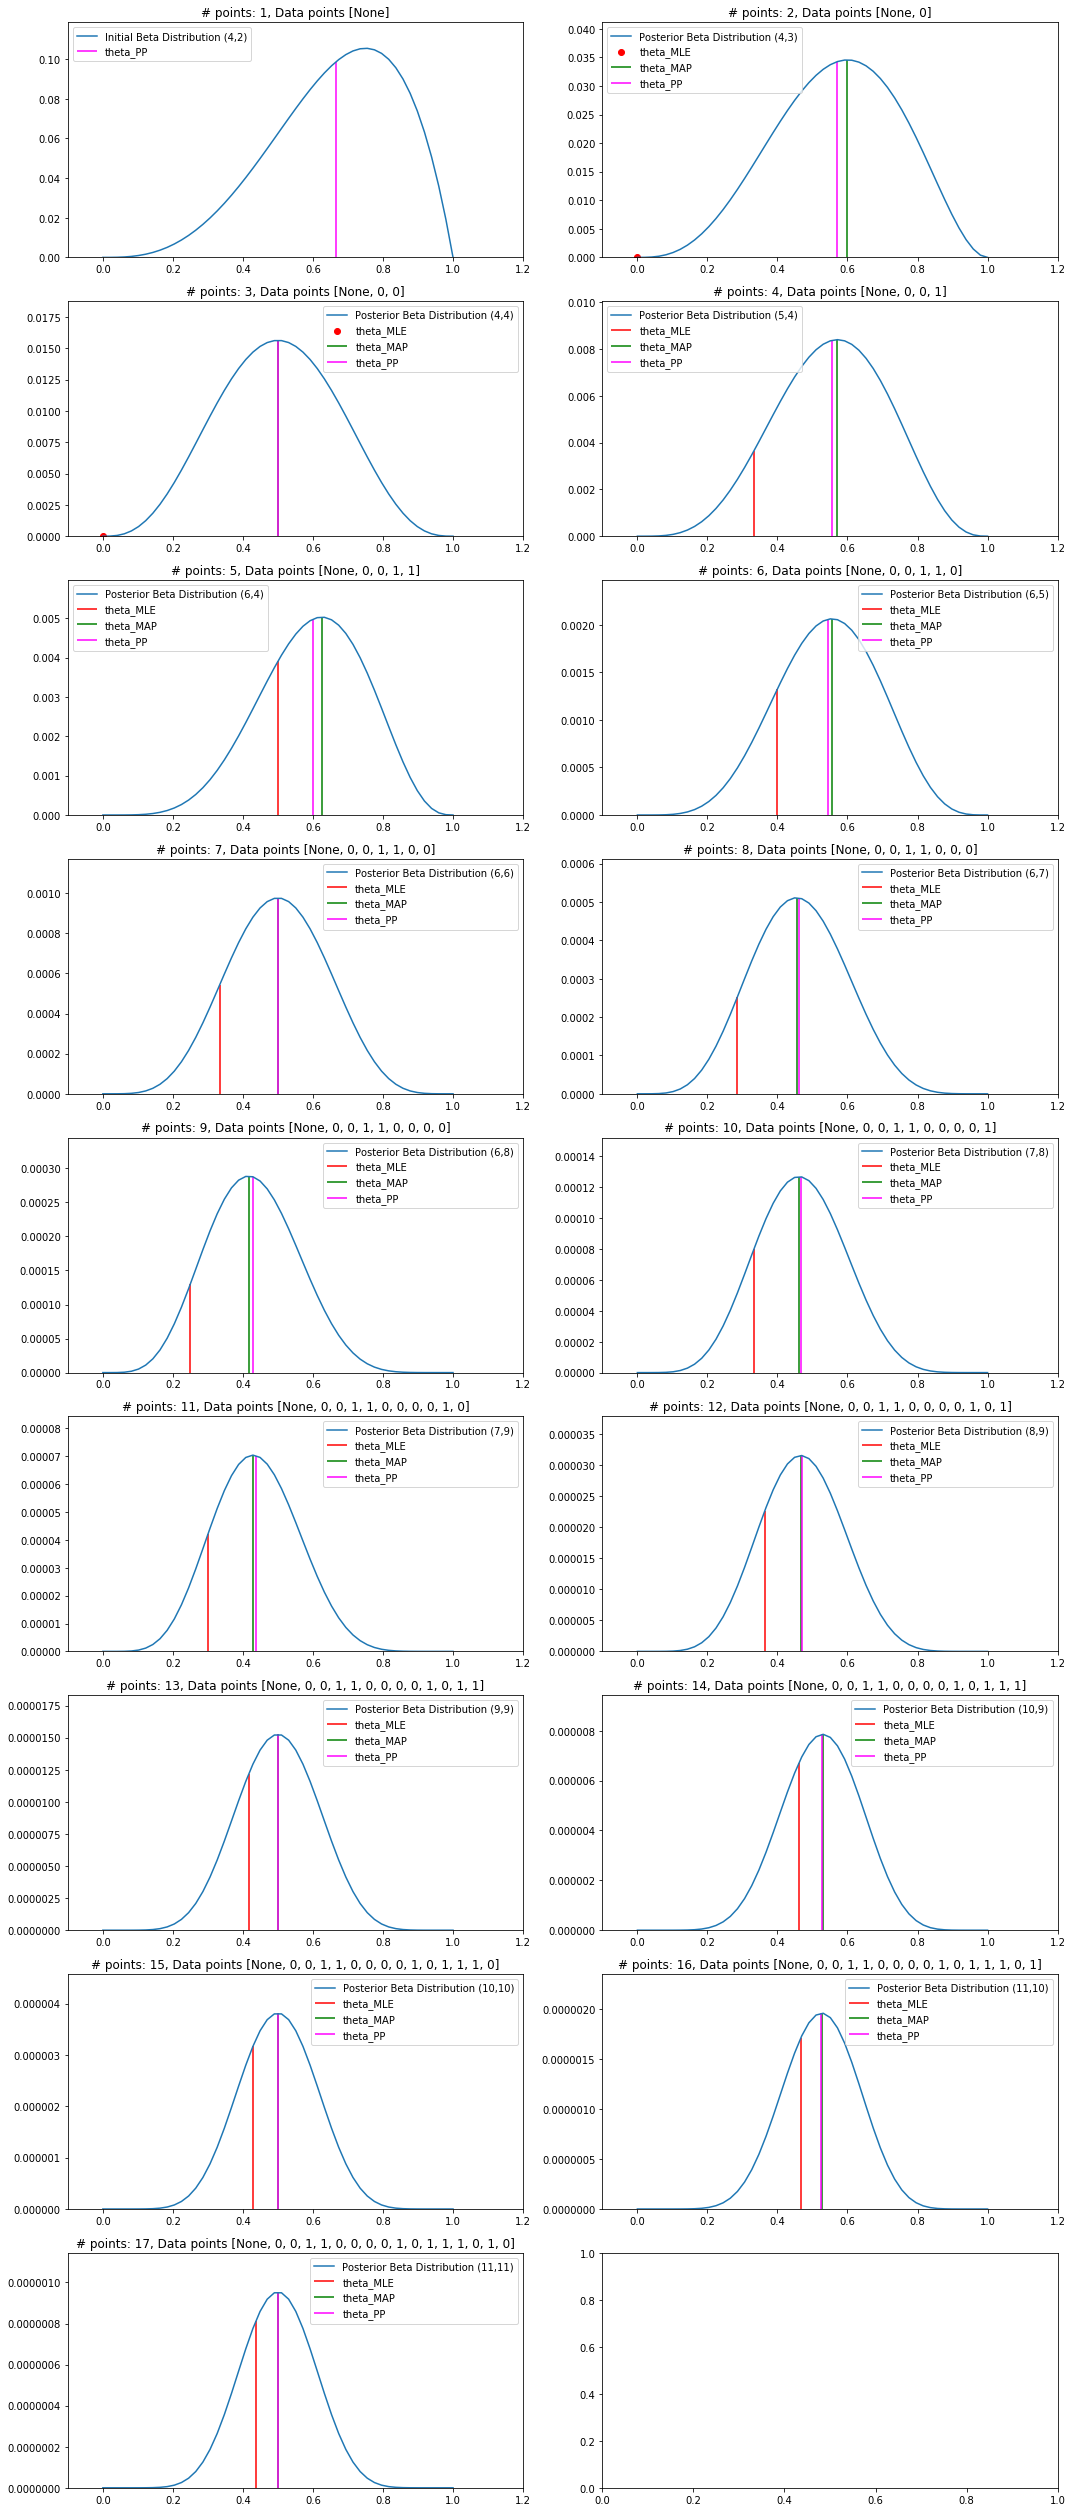

In [10]:
x = np.linspace(0,1,50)

fig, axes = plt.subplots(9, 2,figsize=(15,35));

alpha = 4
beta = 2
n1 = 0
n0 = 0
cnt = 0
points_display =[]

points = [None,0,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0]

row,col = (0,0)

for point in points:

    if point == 1:
        n1+=1
    elif point == 0:
        n0+=1
    
    points_display.append(point)
    plot_thetas(n1=n1,n0=n0,x=x,alpha=4,beta=2,cnt=cnt,save_fig=False,ax=axes[row,col],points=points_display);
    
    if col % 2 == 0:
        col = 1
    else:
        col=0
        row+=1
        
    cnt+=1

plt.savefig("Problem_1")

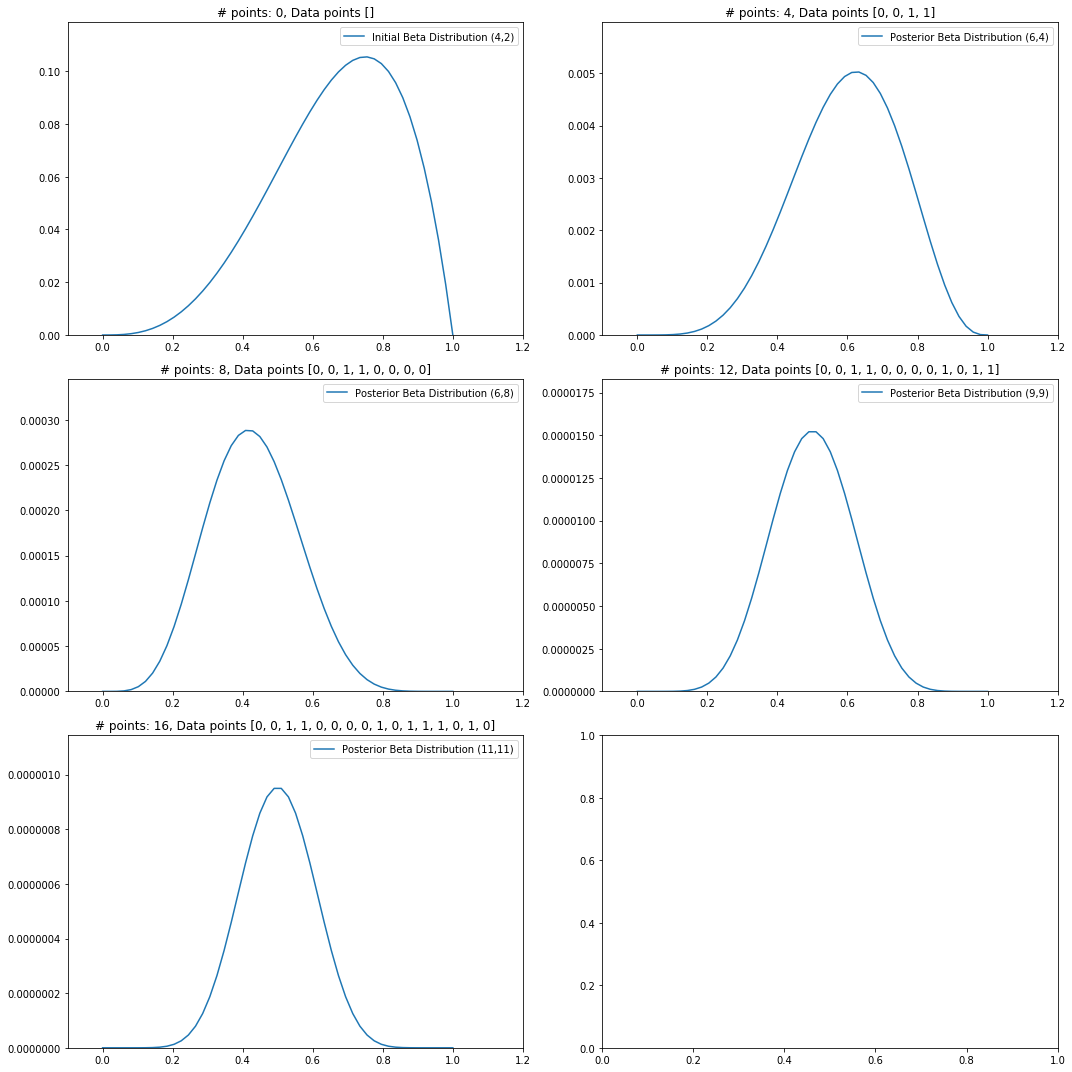

In [11]:
x = np.linspace(0,1,50)

fig, axes = plt.subplots(3, 2,figsize=(15,15));

alpha = 4
beta = 2
n1 = 0
n0 = 0
cnt = 0
points_display =[]

points = [None,0,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0]
checks = [0,4,8,12,16]
row,col = (0,0)

for point in points:

    if point == 1:
        n1+=1
    elif point == 0:
        n0+=1
    if point != None:
        points_display.append(point)
    #print(len(points_display))
    if len(points_display) in checks:
        plot_post_betas(n1=n1,n0=n0,x=x,alpha=4,beta=2,cnt=cnt,save_fig=False,ax=axes[row,col],points=points_display);
    
        if col % 2 == 0:
            col = 1
        else:
            col=0
            row+=1
    
    cnt+=1

plt.savefig("Problem_1_5")

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv('fruit.csv')

In [10]:
data.head(n=5)

,fruit,width,height
0,1,8.4,7.3
1,1,8.0,6.8
2,1,7.4,7.2
3,1,7.1,7.8
4,1,7.4,7.0


In [9]:
data.describe()

,fruit,width,height
count,59.000000,59.000000,59.000000
mean,1.949153,7.105085,7.693220
std,0.775125,0.816938,1.361017
min,1.000000,5.800000,4.000000
25%,1.000000,6.600000,7.200000
50%,2.000000,7.200000,7.600000
75%,3.000000,7.500000,8.200000
max,3.000000,9.600000,10.500000


In [799]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from scipy.misc import logsumexp

# Please implement the fit and predict methods of this class. You can add additional private methods
# by beginning them with two underscores. It may look like the __dummyPrivateMethod below.
# You can feel free to change any of the class attributes, as long as you do not change any of 
# the given function headers (they must take and return the same arguments), and as long as you
# don't change anything in the .visualize() method. 
class LogisticRegression2:
    
    def __init__(self, weights, X, b, eta, lambda_parameter):
        self.eta = eta
        self.lambda_parameter = lambda_parameter
        self.z_s = None
        self.proba = None
        
        self.weights = weights
        
        # add ones
        #self.X = X
        self.X = np.append(np.ones(X.shape[0]).reshape(-1,1),X,axis=1)
        
        self.b = np.zeros([weights.shape[0]]) #bias term slash offset
        
        self.y = pd.get_dummies(y)
        #print(self.y)
        
    #Private method (need to add two underscores in the front)
    def __get_Z(self):
        #Calculate z - scores for each class
        #print(self.b.reshape(-1,1).shape)
        #print(np.dot(self.weights,self.X.T).shape)
        #self.z_s = np.dot(self.weights,self.X.T) #+ self.b.reshape(-1,1)
        
        self.z_s = np.dot(self.weights,self.X.T) + self.b.reshape(-1,1)
        
    # Softmax function for Logistic Regression

    def __Softmax(self,get_class=False):
        
        self.__get_Z()
        
        #If asked for probabilities for each class, calculate here
        self.proba = np.array([np.exp(z)/(np.sum(np.exp(self.z_s),axis=0)) for z in self.z_s]).T
        
        return self.proba
    
    
    def neg_LL(self):
        
        self.__Softmax()
        
        # implementation of loss function with L2 regularizer 
        
        return -np.sum(np.log(self.proba)) + self.lambda_parameter*np.sum(np.power(self.weights,2))
    
    def entropy(self):
        cross_entropy = - np.mean(np.sum(self.y * np.log(self.proba) +(1 - self.y) * np.log(1 - self.proba),axis=1))

        return cross_entropy
    
    def __train(self):
        self.__Softmax()
        
        # compute gradient
        grad_y = self.y - self.proba
        #print(grad_y)
        #print("current loss {}".format(grad_y))

        loss_update = self.eta*np.dot(self.X.T,grad_y).T
        #print("update on loss", loss_update)
        
        L2_reg = self.eta*self.lambda_parameter*self.weights
        #print(L2_reg)
        
        #update weigths
        self.weights += loss_update - L2_reg

        # update bias
        self.b = self.eta* np.mean(grad_y,axis=0)

    def fit(self,max_iter=30000):
            
        for it in range(max_iter):
            if it % 1000 == 0:
                print("Cost before iter {} is {}".format(it,self.neg_LL()))
                print("Entropy before iter {} is {}".format(it,self.entropy()))
            self.__train()
            
        return self.weights

    # TODO: Implement this method!
    def predict(self, X_to_predict,get_class=False):
        # The code in this method should be removed and replaced! We included it just so that the distribution code
        # is runnable and produces a (currently meaningless) visualization.
        #return one-hot encoding for each data point based on maximum probability
        
        X_to_predict = np.append(np.ones(X_to_predict.shape[0]).reshape(-1,1),X_to_predict,axis=1)
        
        z_s = np.dot(self.weights,X_to_predict.T) #+ self.b.reshape(-1,1)
        
        proba = np.array([np.exp(z)/(np.sum(np.exp(z_s),axis=0)) for z in z_s]).T
        
        if get_class:
            
            y_pred = np.squeeze(np.zeros([X_to_predict.shape[0]]))

            # convert one-hot back to normal labels
            for idx,row in enumerate(proba):
                y_pred[idx] = np.argmax(row)+1
        
            return y_pred
        
        
        return proba
    
    def visualize(self, output_file, width=2, show_charts=False):
        X = self.X

        # Create a grid of points
        x_min, x_max = min(X[:, 0] - width), max(X[:, 0] + width)
        y_min, y_max = min(X[:, 1] - width), max(X[:, 1] + width)
        xx,yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min,
            y_max, .05))

        # Flatten the grid so the values match spec for self.predict
        xx_flat = xx.flatten()
        yy_flat = yy.flatten()
        
        X_topredict = np.vstack((xx_flat,yy_flat)).T
        
        print(X_topredict.shape)
        # Get the class predictions
        Y_hat = self.predict(X_topredict,get_class=True)
        
        
        Y_hat = Y_hat.reshape((xx.shape[0], xx.shape[1]))
        
        cMap = c.ListedColormap(['r','b','g'])

        # Visualize them.
        plt.figure()
        plt.pcolormesh(xx,yy,Y_hat, cmap=cMap)
        plt.scatter(X[:, 0], X[:, 1], cmap=cMap)
        plt.savefig(output_file)
        if show_charts:
            plt.show()

In [800]:
X = data.loc[:,'width':'height']
y = pd.get_dummies(data['fruit'])
# Dummy weigths
weights = np.array([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]])

In [801]:
# test
test = LogisticRegression2(weights=weights,X=X,b=0,eta=0.05,lambda_parameter=0.01)
test.fit()

Cost before iter 0 is 194.4768750942554
Entropy before iter 0 is 1.909542504884441


/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Cost before iter 1000 is 8470.155723118529
Entropy before iter 1000 is inf
Cost before iter 2000 is 8313.250088735807
Entropy before iter 2000 is inf
Cost before iter 3000 is 8511.72719673856
Entropy before iter 3000 is inf
Cost before iter 4000 is 9637.829877612088
Entropy before iter 4000 is inf
Cost before iter 5000 is 11307.494978840132
Entropy before iter 5000 is inf
Cost before iter 6000 is 8524.269277280237
Entropy before iter 6000 is inf
Cost before iter 7000 is 9630.223071151491
Entropy before iter 7000 is inf
Cost before iter 8000 is 11303.21419170558
Entropy before iter 8000 is inf
Cost before iter 9000 is 8524.146731451077
Entropy before iter 9000 is inf
Cost before iter 10000 is 9628.872199225627
Entropy before iter 10000 is inf
Cost before iter 11000 is 11302.316469843143
Entropy before iter 11000 is inf
Cost before iter 12000 is 8524.032635745294
Entropy before iter 12000 is inf
Cost before iter 13000 is 9628.556596537122
Entropy before iter 13000 is inf
Cost before iter

array([[-13.77998334,  28.27439652, -23.71291531],
       [  4.83015832,  31.87451482, -31.76654725],
       [  8.94982548, -60.14891088,  55.47946302]])

In [802]:
test.predict(X,get_class=True)

array([1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 3.,
       1., 3., 1., 1., 3., 3., 1., 3., 1., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

In [803]:
from sklearn.metrics import confusion_matrix

y_pred = test.predict(X,get_class=True)

                    
#Evaluate Confusion Matrix of the Logit Regression
confusion_matrix(data['fruit'].values,y_pred)

array([[18,  0,  1],
       [13,  5,  6],
       [ 0,  0, 16]])

(12480, 2)


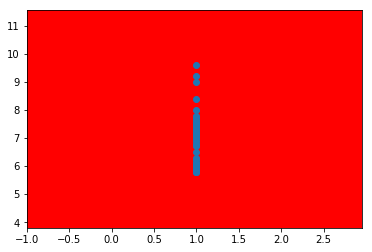

In [804]:
test.visualize('logistic_regression.png')

Test fruit predictions for Gaussian Model:
width 4 cm and height 11 cm: 2
width 8.5 cm and height 7 cm: 2
Test fruit predictions for Shared Covariance Gaussian Model:
width 4 cm and height 11 cm: 2
width 8.5 cm and height 7 cm: 2
Test fruit predictions for Linear Regression:
width 4 cm and height 11 cm: 2
width 8.5 cm and height 7 cm: 2


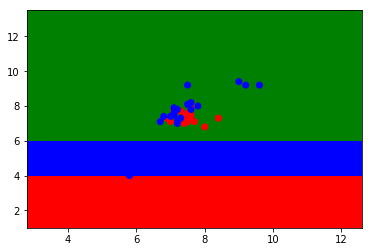

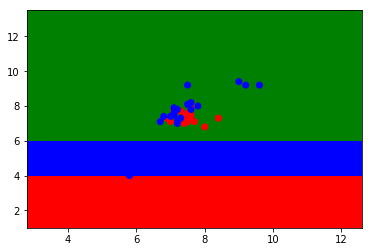

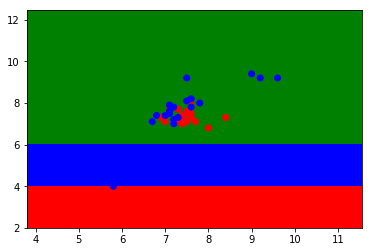

In [690]:
# Don't change these imports. Note that the last two are the
# class implementations that you will implement in
# LogisticRegression.py and GaussianNaiveBayes.py

import matplotlib.pyplot as plt
import pandas as pd
from LogisticRegression import LogisticRegression
from GaussianGenerativeModel import GaussianGenerativeModel


## These are the hyperparameters to the classifiers. You may need to
# adjust these as you try to find the best fit for each classifier.

# Logistic Regression parameters
eta = .1
lambda_parameter = .1


# Do not change anything below this line!!
# -----------------------------------------------------------------

# Read from file and extract X and Y
df = pd.read_csv("fruit.csv")
X = df[['width', 'height']].values
Y = (df['fruit'] - 1).values

nb1 = GaussianGenerativeModel(isSharedCovariance=False)
nb1.fit(X,Y)
nb1.visualize("generative_result_separate_covariances.png")

nb2 = GaussianGenerativeModel(isSharedCovariance=True)
nb2.fit(X,Y)
nb2.visualize("generative_result_shared_covariances.png")

lr = LogisticRegression(eta=eta, lambda_parameter=lambda_parameter)
lr.fit(X,Y)
lr.visualize('logistic_regression_result.png')

X_test = np.array([[4,11],[8.5,7]])
Y_nb1 = nb1.predict(X_test)
Y_nb2 = nb2.predict(X_test)
Y_lr = lr.predict(X_test)

print("Test fruit predictions for Gaussian Model:")
print("width 4 cm and height 11 cm: " + str(Y_nb1[0]))
print("width 8.5 cm and height 7 cm: " + str(Y_nb1[1]))

print("Test fruit predictions for Shared Covariance Gaussian Model:")
print("width 4 cm and height 11 cm: " + str(Y_nb2[0]))
print("width 8.5 cm and height 7 cm: " + str(Y_nb2[1]))

print("Test fruit predictions for Linear Regression:")
print("width 4 cm and height 11 cm: " + str(Y_lr[0]))
print("width 8.5 cm and height 7 cm: " + str(Y_lr[1]))